# CAO Points Analysis
Jody Bradley - G00387878
***
## Introduction
We have been tasked with creating a Jupyter notebook which contains the following:

* A clear and concise overview of how to load CAO points information from the CAO website into a pandas data frame.
* A detailed comparison of CAO points in 2019, 2020, and 2021 using the functionality in pandas.
* Appropriate plots and other visualisations to enhance your notebook for viewers.

## Web Scraping
"Web Scraping" allows us to pull a large amount of data from a website in a quick and efficient manner. The purpose of this Jupyter notebook is to provide a clear and concise overview of how to load CAO points information from the CAO website into a pandas data frame.

## Importing required packages
We will need to import a number of packages to help us with this task.

#### Regular Expression
A Regular Expression is a sequence of characters that forms a search pattern. It can be used to check if a string contains a specific search patter [1]

#### Requests
The requests module allows us to send a HTTP request using Python. It returns a Response Object with all the response data (content, encoding, status, etc.) [2]

#### DateTime
This module allows us to work with dates as data objects [3].

#### Pandas
Pandas is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring and manipulating data [4].

#### Urllib
The Urllib package is used for fetching and handling URLs [5]. We'll be using urllib.request for downloading.

#### Seaborn 
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
# Convenient HTTP requests.
import requests as rq

# Regular expressions.
import re

# Dates and times.
import datetime as dt

# Data frames.
import pandas as pd

# For downloading.
import urllib.request as urlrq

# For plotting.
import matplotlib.pyplot as plt

# For plotting style.
import seaborn as sns


### Get the current date and time

We'll be using the datetime function to give our saved files a unique name when scraping the data from the CAO website. First, let's get the current date and time and format it as a string. 

In [2]:
# Get the current date and time.
now = dt.datetime.now()

# Format as a string.
nowstr = now.strftime('%Y%m%d_%H%M%S')

<br>

## 2021 Points

***
In this section we will download the 2021 data from the CAO website.

In [3]:
# Fetch the CAO points URL [6]:
#resp = rq.get('http://www2.cao.ie/points/l8.php') 

# Have a quick peek. 200 means OK.
#resp

<br>

## Save original data set

***

In [4]:
# Create a file path for the original data.
#pathhtml = 'data/cao2021_' + nowstr + '.html'

<br>

**Error on server**


Technically, the server says we should decode as per:
    
```
Content-Type: text/html; charset=iso-8859-1
```

However, one line uses \x96 which isn't defined in iso-8859-1.

Therefore we use the similar decoding standard cp1252, which is very similar but includes #x96.

In [5]:
# The server uses the wrong encoding, fix it.
#original_encoding = resp.encoding

# Change to cp1252.
#resp.encoding = 'cp1252'

In [6]:
# Save the original html file.
#with open(pathhtml, 'w') as f:
#    f.write(resp.text)

<br>

## Use regular expressions to select lines we want

***

In [7]:
# Compile the regular expression for matching lines.
#re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')

<br>

#### Loop through the lines of the response

***

In [8]:
# The file path for the csv file.
#path2021 = 'data/cao2021_csv_' + nowstr + '.csv'

In [9]:
# Keep track of how many courses we process.
#no_lines = 0

# Open the csv file for writing.
#with open(path2021, 'w') as f:
    # Write a header row.
    #f.write(','.join(['code', 'title', 'pointsR1', 'pointsR2']) + '\n')
    # Loop through lines of the response.
    #for line in resp.iter_lines():
        # Decode the line, using the wrong encoding!
        #dline = line.decode('cp1252')
        # Match only the lines representing courses.
        #if re_course.fullmatch(dline):
            # Add one to the lines counter.
            #no_lines = no_lines + 1
            # The course code.
            #course_code = dline[:5]
            # The course title.
            #course_title = dline[7:57].strip()
            # Round one points.
            #course_points = re.split(' +', dline[60:])
            #if len(course_points) != 2:
                #course_points = course_points[:2]
            # Join the fields using a comma.
            #linesplit = [course_code, course_title, course_points[0], course_points[1]]
            # Rejoin the substrings with commas in between.
            #f.write(','.join(linesplit) + '\n')

# Print the total number of processed lines.
#print(f"Total number of lines is {no_lines}.")

<br>

**NB:** it was verified as of 03/11/2021 that there were 949 courses exactly in the CAO 2021 points list.

***

In [10]:
#df2021 = pd.read_csv(path2021, encoding='cp1252')

In [11]:
#df2021

## 2021 points from Excel (approach 2)
---
Since initial data scrape, CAO website was updated to provide 2021 points in xlsx format. 

In [12]:
# Get the 2021 CAO points:
url2021 = 'http://www2.cao.ie/points/CAOPointsCharts2021.xlsx'

<br>

#### Save Original File

***

In [13]:
# Create a file path for the original data.
pathxlsx = 'data/cao2021_' + nowstr + '.xlsx'

In [14]:
urlrq.urlretrieve(url2021, pathxlsx)

('data/cao2021_20220105_172141.xlsx',
 <http.client.HTTPMessage at 0x209c8f18520>)

<br>

#### Load Spreadsheet using pandas

***

In [15]:
# Download and parse the excel spreadsheet.
df2021 = pd.read_excel(url2021, skiprows=11)

In [16]:
# We only want the level 8 courses
df2021 = df2021[df2021['Course Level'] == 8]

In [17]:
df2021

,CATEGORY (ISCED Description),Course Title,Course Code,R1 Points,R1 Random,R2 Points,R2 Random,EOS Points,EOS Random,EOS Midpoints,Course Level,HEI,Test/Interview,AVP,v
29,Information and Communication Technologies (ICTs),Software Design for Virtual Reality and Gaming,AL801,300,NaN,NaN,NaN,300,NaN,359,8,Athlone Institute of Technology,NaN,NaN,NaN
30,Information and Communication Technologies (ICTs),Software Design in Artificial Intelligence for...,AL802,313,NaN,NaN,NaN,313,NaN,381,8,Athlone Institute of Technology,NaN,NaN,NaN
31,Information and Communication Technologies (ICTs),Software Design for Mobile Apps and Connected ...,AL803,350,NaN,NaN,NaN,350,NaN,398,8,Athlone Institute of Technology,NaN,NaN,NaN
32,Information and Communication Technologies (ICTs),Computer Engineering for Network Infrastructure,AL805,321,NaN,NaN,NaN,321,NaN,381,8,Athlone Institute of Technology,NaN,NaN,NaN
33,Architecture and construction,Quantity Surveying,AL810,328,NaN,NaN,NaN,328,NaN,377,8,Athlone Institute of Technology,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,Information and Communication Technologies (ICTs),Creative Computing,WD211,270,NaN,NaN,NaN,270,NaN,392,8,Waterford Institute of Technology,NaN,NaN,NaN
1447,Personal services,Recreation and Sport Management,WD212,262,NaN,NaN,NaN,262,NaN,304,8,Waterford Institute of Technology,NaN,NaN,NaN
1448,Engineering and engineering trades,Mechanical and Manufacturing Engineering,WD230,230,NaN,230,NaN,230,NaN,361,8,Waterford Institute of Technology,NaN,avp,NaN
1449,Welfare,Early Childhood Care and Education,WD231,266,NaN,NaN,NaN,266,NaN,366,8,Waterford Institute of Technology,NaN,NaN,NaN


In [18]:
# And we only want the 1st, 2nd and EOS points
df2021 = df2021.loc[:, ['Course Code', 'Course Title', 'HEI', 'R1 Points', 'R2 Points ', 'EOS Points']]


In [19]:
df2021

,Course Code,Course Title,HEI,R1 Points,R2 Points,EOS Points
29,AL801,Software Design for Virtual Reality and Gaming,Athlone Institute of Technology,300,NaN,300
30,AL802,Software Design in Artificial Intelligence for...,Athlone Institute of Technology,313,NaN,313
31,AL803,Software Design for Mobile Apps and Connected ...,Athlone Institute of Technology,350,NaN,350
32,AL805,Computer Engineering for Network Infrastructure,Athlone Institute of Technology,321,NaN,321
33,AL810,Quantity Surveying,Athlone Institute of Technology,328,NaN,328
...,...,...,...,...,...,...
1446,WD211,Creative Computing,Waterford Institute of Technology,270,NaN,270
1447,WD212,Recreation and Sport Management,Waterford Institute of Technology,262,NaN,262
1448,WD230,Mechanical and Manufacturing Engineering,Waterford Institute of Technology,230,230,230
1449,WD231,Early Childhood Care and Education,Waterford Institute of Technology,266,NaN,266


In [20]:
#df2021.colums = ['Course Code', 'Course Title', 'HEI', 'R1 Points 2021', 'R2 Points 2021', 'EOS Points 2021']
#df2020_r2.columns = ['code', 'points_r2_2020']

In [21]:
# Create a file path for the pandas data.
path2021 = 'data/cao2021_' + nowstr + '.csv'

In [22]:
# Save pandas data frame to disk.
df2021.to_csv(path2021)

<br>

## 2020 Points

***

In [23]:
# Get the 2020 CAO points [7]:
url2020 = 'http://www2.cao.ie/points/CAOPointsCharts2020.xlsx'

<br>

#### Save Original File

***

In [24]:
# Create a file path for the original data.
pathxlsx = 'data/cao2020_' + nowstr + '.xlsx'

In [25]:
urlrq.urlretrieve(url2020, pathxlsx)

('data/cao2020_20220105_172141.xlsx',
 <http.client.HTTPMessage at 0x209c961a190>)

<br>

#### Load Spreadsheet using pandas

***

In [26]:
# Download and parse the excel spreadsheet.
df2020 = pd.read_excel(url2020, skiprows=10)

In [27]:
df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# We only want the 1st, 2nd and EOS points
df2020 = df2020.loc[:, ['COURSE CODE2', 'COURSE TITLE', 'HEI', 'R1 POINTS', 'R2 POINTS', 'EOS']]
#df2020.columns = ['code', 'course', 'HEI']

In [29]:
df2020

,COURSE CODE2,COURSE TITLE,HEI,R1 POINTS,R2 POINTS,EOS
0,AC120,International Business,American College,209,NaN,209
1,AC137,Liberal Arts,American College,252,NaN,252
2,AD101,"First Year Art & Design (Common Entry,portfolio)",National College of Art and Design,#+matric,NaN,#+matric
3,AD102,Graphic Design and Moving Image Design (portfo...,National College of Art and Design,#+matric,NaN,#+matric
4,AD103,Textile & Surface Design and Jewellery & Objec...,National College of Art and Design,#+matric,NaN,#+matric
...,...,...,...,...,...,...
1459,WD208,Manufacturing Engineering,Waterford Institute of Technology,188,NaN,188
1460,WD210,Software Systems Development,Waterford Institute of Technology,279,NaN,279
1461,WD211,Creative Computing,Waterford Institute of Technology,271,NaN,271
1462,WD212,Recreation and Sport Management,Waterford Institute of Technology,270,NaN,270


In [30]:
# Remove "#+matric" from pandas df to help us out further on.
# code adapted from GeekForGeeks [8]: 
#df2020['R1 POINTS'] = df2020['R1 POINTS'].replace({'[#+matric]':'0'}, regex=True)
#df2020['R1 POINTS'] = df2020['R1 POINTS'].replace({'AQA':'0'}, regex=True)

In [31]:
# Create a file path for the pandas data.
path2020 = 'data/cao2020_' + nowstr + '.csv'

In [32]:
# Save pandas data frame to disk.
df2020.to_csv(path2020)

<br>

## 2019 Points

***

In [33]:
# Get 2019 CAO points [9]:
df2019 = pd.read_excel('data/cao2019_20211230_edited.xlsx')

In [34]:
df2019 = df2019.loc[:, ['code', 'course', 'HEI', 'points']]

In [35]:
df2019

,code,course,HEI,points
0,AC120,International Business,American College,234
1,AC137,Liberal Arts,American College,252
2,AD101,First Year Art & Design (Common Entry),National College of Art and Design,NaN
3,AD102,Graphic Design and Moving Image Design,National College of Art and Design,NaN
4,AD103,Textile & Surface Design and Jewellery & Objects,National College of Art and Design,NaN
...,...,...,...,...
925,WD200,Arts (options),Waterford Institute of Technology,221
926,WD210,Software Systems Development,Waterford Institute of Technology,271
927,WD211,Creative Computing,Waterford Institute of Technology,275
928,WD212,Recreation and Sport Management,Waterford Institute of Technology,274


<br>

## concat and join

***

In [36]:
courses2021 = df2021[['Course Code','Course Title','HEI']]
courses2021.columns = ['code', 'course', 'HEI']
courses2021

,code,course,HEI
29,AL801,Software Design for Virtual Reality and Gaming,Athlone Institute of Technology
30,AL802,Software Design in Artificial Intelligence for...,Athlone Institute of Technology
31,AL803,Software Design for Mobile Apps and Connected ...,Athlone Institute of Technology
32,AL805,Computer Engineering for Network Infrastructure,Athlone Institute of Technology
33,AL810,Quantity Surveying,Athlone Institute of Technology
...,...,...,...
1446,WD211,Creative Computing,Waterford Institute of Technology
1447,WD212,Recreation and Sport Management,Waterford Institute of Technology
1448,WD230,Mechanical and Manufacturing Engineering,Waterford Institute of Technology
1449,WD231,Early Childhood Care and Education,Waterford Institute of Technology


In [37]:
courses2020 = df2020[['COURSE CODE2','COURSE TITLE', 'HEI']]
courses2020.columns = ['code', 'course', 'HEI']
courses2020

,code,course,HEI
0,AC120,International Business,American College
1,AC137,Liberal Arts,American College
2,AD101,"First Year Art & Design (Common Entry,portfolio)",National College of Art and Design
3,AD102,Graphic Design and Moving Image Design (portfo...,National College of Art and Design
4,AD103,Textile & Surface Design and Jewellery & Objec...,National College of Art and Design
...,...,...,...
1459,WD208,Manufacturing Engineering,Waterford Institute of Technology
1460,WD210,Software Systems Development,Waterford Institute of Technology
1461,WD211,Creative Computing,Waterford Institute of Technology
1462,WD212,Recreation and Sport Management,Waterford Institute of Technology


In [38]:
courses2019 = df2019[['code', 'course', 'HEI']]
courses2019.columns = ['code', 'course', 'HEI']
courses2019.sort_values('code')

,code,course,HEI
0,AC120,International Business,American College
1,AC137,Liberal Arts,American College
2,AD101,First Year Art & Design (Common Entry),National College of Art and Design
3,AD102,Graphic Design and Moving Image Design,National College of Art and Design
4,AD103,Textile & Surface Design and Jewellery & Objects,National College of Art and Design
...,...,...,...
925,WD200,Arts (options),Waterford Institute of Technology
926,WD210,Software Systems Development,Waterford Institute of Technology
927,WD211,Creative Computing,Waterford Institute of Technology
928,WD212,Recreation and Sport Management,Waterford Institute of Technology


In [39]:
allcourses = pd.concat([courses2021, courses2020, courses2019], ignore_index=True)
allcourses

,code,course,HEI
0,AL801,Software Design for Virtual Reality and Gaming,Athlone Institute of Technology
1,AL802,Software Design in Artificial Intelligence for...,Athlone Institute of Technology
2,AL803,Software Design for Mobile Apps and Connected ...,Athlone Institute of Technology
3,AL805,Computer Engineering for Network Infrastructure,Athlone Institute of Technology
4,AL810,Quantity Surveying,Athlone Institute of Technology
...,...,...,...
3423,WD200,Arts (options),Waterford Institute of Technology
3424,WD210,Software Systems Development,Waterford Institute of Technology
3425,WD211,Creative Computing,Waterford Institute of Technology
3426,WD212,Recreation and Sport Management,Waterford Institute of Technology


In [40]:
#allcourses.sort_values('code')

In [41]:
# Finds all extra copies of duplicated rows.
#allcourses[allcourses.duplicated()]

In [42]:
# Returns a copy of the data frame with duplicates removed.
#allcourses.drop_duplicates()

In [43]:
# Finds all extra copies of duplicated rows.
#allcourses[allcourses.duplicated(subset=['code'])]

In [44]:
# Returns a copy of the data frame with duplicates removed - based only on code.
allcourses.drop_duplicates(subset=['code'], inplace=True, ignore_index=True)

In [45]:
allcourses.sort_values('code')

,code,course,HEI
175,AC120,International Business,American College
176,AC137,Liberal Arts,American College
312,AD101,"First Year Art and Design (Common Entry,portfo...",National College of Art and Design
313,AD102,Graphic Design and Moving Image Design (portfo...,National College of Art and Design
314,AD103,Textile and Surface Design and Jewellery and O...,National College of Art and Design
...,...,...,...
1029,WD211,Creative Computing,Waterford Institute of Technology
1030,WD212,Recreation and Sport Management,Waterford Institute of Technology
1031,WD230,Mechanical and Manufacturing Engineering,Waterford Institute of Technology
1032,WD231,Early Childhood Care and Education,Waterford Institute of Technology


In [46]:
# Look at data in csv - all courses seem to be here. 
allcourses.to_csv("allcourses1.csv")

<br>

## Join to the points

***

In [47]:
# Set the index to the code column.
df2021.set_index('Course Code', inplace=True)
#df2021.columns = ['title', 'R1 Points', 'R2 Points']
df2021

,Course Title,HEI,R1 Points,R2 Points,EOS Points
Course Code,,,,,
AL801,Software Design for Virtual Reality and Gaming,Athlone Institute of Technology,300,NaN,300
AL802,Software Design in Artificial Intelligence for...,Athlone Institute of Technology,313,NaN,313
AL803,Software Design for Mobile Apps and Connected ...,Athlone Institute of Technology,350,NaN,350
AL805,Computer Engineering for Network Infrastructure,Athlone Institute of Technology,321,NaN,321
AL810,Quantity Surveying,Athlone Institute of Technology,328,NaN,328
...,...,...,...,...,...
WD211,Creative Computing,Waterford Institute of Technology,270,NaN,270
WD212,Recreation and Sport Management,Waterford Institute of Technology,262,NaN,262
WD230,Mechanical and Manufacturing Engineering,Waterford Institute of Technology,230,230,230


In [48]:
# Set the index to the code column.
allcourses.set_index('code', inplace=True)

In [49]:
allcourses = allcourses.join(df2021[['R1 Points', 'R2 Points ']])
allcourses

,course,HEI,R1 Points,R2 Points
code,,,,
AL801,Software Design for Virtual Reality and Gaming,Athlone Institute of Technology,300,NaN
AL802,Software Design in Artificial Intelligence for...,Athlone Institute of Technology,313,NaN
AL803,Software Design for Mobile Apps and Connected ...,Athlone Institute of Technology,350,NaN
AL805,Computer Engineering for Network Infrastructure,Athlone Institute of Technology,321,NaN
AL810,Quantity Surveying,Athlone Institute of Technology,328,NaN
...,...,...,...,...
TA328,Computing with Language (French/German/Spanish),Technological University Dublin Tallaght Campus,NaN,NaN
TA329,Computing with Data Analytics,Technological University Dublin Tallaght Campus,NaN,NaN
TL803,Music Technology,"Institute of Technology, Tralee",NaN,NaN


In [50]:
df2020_r1 = df2020[['COURSE CODE2', 'R1 POINTS']]
df2020_r1.columns = ['code', 'R1 Points 2020', ]
df2020_r1

,code,R1 Points 2020
0,AC120,209
1,AC137,252
2,AD101,#+matric
3,AD102,#+matric
4,AD103,#+matric
...,...,...
1459,WD208,188
1460,WD210,279
1461,WD211,271
1462,WD212,270


In [51]:
# Set the index to the code column.
df2020_r1.set_index('code', inplace=True)
df2020_r1

,R1 Points 2020
code,
AC120,209
AC137,252
AD101,#+matric
AD102,#+matric
AD103,#+matric
...,...
WD208,188
WD210,279
WD211,271


In [52]:
# Join 2020 points to allcourses.
allcourses = allcourses.join(df2020_r1)
allcourses

,course,HEI,R1 Points,R2 Points,R1 Points 2020
code,,,,,
AL801,Software Design for Virtual Reality and Gaming,Athlone Institute of Technology,300,NaN,303
AL802,Software Design in Artificial Intelligence for...,Athlone Institute of Technology,313,NaN,332
AL803,Software Design for Mobile Apps and Connected ...,Athlone Institute of Technology,350,NaN,337
AL805,Computer Engineering for Network Infrastructure,Athlone Institute of Technology,321,NaN,333
AL810,Quantity Surveying,Athlone Institute of Technology,328,NaN,319
...,...,...,...,...,...
TA328,Computing with Language (French/German/Spanish),Technological University Dublin Tallaght Campus,NaN,NaN,NaN
TA329,Computing with Data Analytics,Technological University Dublin Tallaght Campus,NaN,NaN,NaN
TL803,Music Technology,"Institute of Technology, Tralee",NaN,NaN,NaN


In [53]:
# Join 2020 round 2 points 
df2020_r2 = df2020[['COURSE CODE2', 'R2 POINTS']]
df2020_r2.columns = ['code', 'R2 Points 2020']
df2020_r2

,code,R2 Points 2020
0,AC120,NaN
1,AC137,NaN
2,AD101,NaN
3,AD102,NaN
4,AD103,NaN
...,...,...
1459,WD208,NaN
1460,WD210,NaN
1461,WD211,NaN
1462,WD212,NaN


In [54]:
# Set the index to the code column.
df2020_r2.set_index('code', inplace=True)
df2020_r2

,R2 Points 2020
code,
AC120,NaN
AC137,NaN
AD101,NaN
AD102,NaN
AD103,NaN
...,...
WD208,NaN
WD210,NaN
WD211,NaN


In [55]:
# Join 2020 round 2 points to allcourses.
allcourses = allcourses.join(df2020_r2)
allcourses

,course,HEI,R1 Points,R2 Points,R1 Points 2020,R2 Points 2020
code,,,,,,
AL801,Software Design for Virtual Reality and Gaming,Athlone Institute of Technology,300,NaN,303,NaN
AL802,Software Design in Artificial Intelligence for...,Athlone Institute of Technology,313,NaN,332,NaN
AL803,Software Design for Mobile Apps and Connected ...,Athlone Institute of Technology,350,NaN,337,NaN
AL805,Computer Engineering for Network Infrastructure,Athlone Institute of Technology,321,NaN,333,NaN
AL810,Quantity Surveying,Athlone Institute of Technology,328,NaN,319,NaN
...,...,...,...,...,...,...
TA328,Computing with Language (French/German/Spanish),Technological University Dublin Tallaght Campus,NaN,NaN,NaN,NaN
TA329,Computing with Data Analytics,Technological University Dublin Tallaght Campus,NaN,NaN,NaN,NaN
TL803,Music Technology,"Institute of Technology, Tralee",NaN,NaN,NaN,NaN


In [56]:
df2019_r1 = df2019[['code', 'points']]
df2019_r1.columns = ['code', 'R1 Points 2019']
df2019_r1

,code,R1 Points 2019
0,AC120,234
1,AC137,252
2,AD101,NaN
3,AD102,NaN
4,AD103,NaN
...,...,...
925,WD200,221
926,WD210,271
927,WD211,275
928,WD212,274


In [57]:
# Set the index to the code column.
df2019_r1.set_index('code', inplace=True)
df2019_r1

,R1 Points 2019
code,
AC120,234
AC137,252
AD101,NaN
AD102,NaN
AD103,NaN
...,...
WD200,221
WD210,271
WD211,275


In [58]:
# Join 2019 points to allcourses.
allcourses = allcourses.join(df2019_r1)
allcourses

,course,HEI,R1 Points,R2 Points,R1 Points 2020,R2 Points 2020,R1 Points 2019
code,,,,,,,
AL801,Software Design for Virtual Reality and Gaming,Athlone Institute of Technology,300,NaN,303,NaN,304
AL802,Software Design in Artificial Intelligence for...,Athlone Institute of Technology,313,NaN,332,NaN,301
AL803,Software Design for Mobile Apps and Connected ...,Athlone Institute of Technology,350,NaN,337,NaN,309
AL805,Computer Engineering for Network Infrastructure,Athlone Institute of Technology,321,NaN,333,NaN,329
AL810,Quantity Surveying,Athlone Institute of Technology,328,NaN,319,NaN,307
...,...,...,...,...,...,...,...
TA328,Computing with Language (French/German/Spanish),Technological University Dublin Tallaght Campus,NaN,NaN,NaN,NaN,218
TA329,Computing with Data Analytics,Technological University Dublin Tallaght Campus,NaN,NaN,NaN,NaN,218
TL803,Music Technology,"Institute of Technology, Tralee",NaN,NaN,NaN,NaN,264


In [59]:
# Replace NA with 0
allcourses.fillna(0)

,course,HEI,R1 Points,R2 Points,R1 Points 2020,R2 Points 2020,R1 Points 2019
code,,,,,,,
AL801,Software Design for Virtual Reality and Gaming,Athlone Institute of Technology,300,0,303,0,304
AL802,Software Design in Artificial Intelligence for...,Athlone Institute of Technology,313,0,332,0,301
AL803,Software Design for Mobile Apps and Connected ...,Athlone Institute of Technology,350,0,337,0,309
AL805,Computer Engineering for Network Infrastructure,Athlone Institute of Technology,321,0,333,0,329
AL810,Quantity Surveying,Athlone Institute of Technology,328,0,319,0,307
...,...,...,...,...,...,...,...
TA328,Computing with Language (French/German/Spanish),Technological University Dublin Tallaght Campus,0,0,0,0,218
TA329,Computing with Data Analytics,Technological University Dublin Tallaght Campus,0,0,0,0,218
TL803,Music Technology,"Institute of Technology, Tralee",0,0,0,0,264


In [76]:
allcourses = allcourses.rename(columns={'R1 Points': 'R1 Points 2021', 'R2 Points ': 'R2 Points 2021'})

In [79]:
# Remove # and * symbols from df.
# Code adapted from StackOverflow [10]:

cols_to_check = ['R1 Points 2021', 'R2 Points 2021', 'R1 Points 2020', 'R2 Points 2020', 'R1 Points 2019']
#allcourses[cols_to_check] = allcourses[cols_to_check].replace({'[#,*]':''}, regex=True)
allcourses[cols_to_check] = allcourses[cols_to_check].replace('[A-Z.#*+a-z]', '', regex = True)

In [80]:
allcourses

,course,HEI,R1 Points 2021,R2 Points 2021,R1 Points 2020,R2 Points 2020,R1 Points 2019
code,,,,,,,
AL801,Software Design for Virtual Reality and Gaming,Athlone Institute of Technology,300,NaN,303,NaN,304
AL802,Software Design in Artificial Intelligence for...,Athlone Institute of Technology,313,NaN,332,NaN,301
AL803,Software Design for Mobile Apps and Connected ...,Athlone Institute of Technology,350,NaN,337,NaN,309
AL805,Computer Engineering for Network Infrastructure,Athlone Institute of Technology,321,NaN,333,NaN,329
AL810,Quantity Surveying,Athlone Institute of Technology,328,NaN,319,NaN,307
...,...,...,...,...,...,...,...
TA328,Computing with Language (French/German/Spanish),Technological University Dublin Tallaght Campus,NaN,NaN,NaN,NaN,218
TA329,Computing with Data Analytics,Technological University Dublin Tallaght Campus,NaN,NaN,NaN,NaN,218
TL803,Music Technology,"Institute of Technology, Tralee",NaN,NaN,NaN,NaN,264


In [81]:
# Print all course to CSV so we can check the stats. 
allcourses.to_csv("allcourses.csv")

In [82]:
# see data type
allcourses.dtypes

course            object
HEI               object
R1 Points 2021    object
R2 Points 2021    object
R1 Points 2020    object
R2 Points 2020    object
R1 Points 2019    object
dtype: object

Data type is appearing as "object" for each of our variables which is text or mixed numeric values. we need to change these to a numeric type which we can do using pandas.to_numeric:

In [83]:
# Convert argument to numeric type [10]
allcourses['R1 Points 2021'] = pd.to_numeric(allcourses['R1 Points 2021'],errors = 'coerce')
allcourses['R2 Points 2021'] = pd.to_numeric(allcourses['R2 Points 2021'],errors = 'coerce')
allcourses['R1 Points 2020'] = pd.to_numeric(allcourses['R1 Points 2020'],errors = 'coerce')
allcourses['R2 Points 2020'] = pd.to_numeric(allcourses['R2 Points 2020'],errors = 'coerce')
allcourses['R1 Points 2019'] = pd.to_numeric(allcourses['R1 Points 2019'],errors = 'coerce')

In [84]:
allcourses.dtypes

course             object
HEI                object
R1 Points 2021    float64
R2 Points 2021    float64
R1 Points 2020    float64
R2 Points 2020    float64
R1 Points 2019    float64
dtype: object

Values are now floating point numbers. 

## Describe the Data

We can use df.describe() to view some basic statistical details of the data set, inlcuding the percentile, mean and standard deviation.


In [85]:
allcourses.describe()

,R1 Points 2021,R2 Points 2021,R1 Points 2020,R2 Points 2020,R1 Points 2019
count,1001.000000,260.000000,1394.000000,316.000000,906.000000
mean,419.503497,417.980769,350.995696,334.329114,374.951435
std,133.020593,148.367889,134.433752,142.016943,123.902697
min,57.000000,60.000000,55.000000,100.000000,55.000000
25%,307.000000,294.000000,252.250000,212.000000,290.000000
50%,412.000000,423.500000,316.500000,305.000000,348.000000
75%,511.000000,523.000000,433.000000,462.750000,440.000000
max,1028.000000,956.000000,1088.000000,768.000000,979.000000


## Analysis
---
We now have a Pandas dataframe titled "allcourses", which shows data for the following variables:
* Course Code 
* Course Title 
* Higher Education Institue ("HEI") 
* Round 1 points for 2021, 2020 and 2019 
* Round 2 points for 2021 and 2020 only (as Round 2 points are not available for 2019). 

In [86]:
allcourses.head()

,course,HEI,R1 Points 2021,R2 Points 2021,R1 Points 2020,R2 Points 2020,R1 Points 2019
code,,,,,,,
AL801,Software Design for Virtual Reality and Gaming,Athlone Institute of Technology,300.0,NaN,303.0,NaN,304.0
AL802,Software Design in Artificial Intelligence for...,Athlone Institute of Technology,313.0,NaN,332.0,NaN,301.0
AL803,Software Design for Mobile Apps and Connected ...,Athlone Institute of Technology,350.0,NaN,337.0,NaN,309.0
AL805,Computer Engineering for Network Infrastructure,Athlone Institute of Technology,321.0,NaN,333.0,NaN,329.0
AL810,Quantity Surveying,Athlone Institute of Technology,328.0,NaN,319.0,NaN,307.0


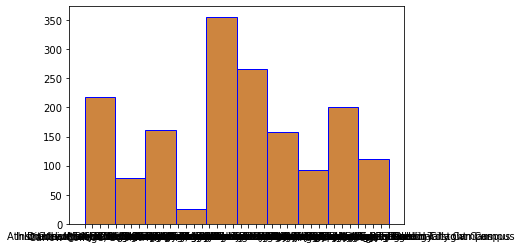

In [87]:
plt.hist(allcourses['HEI'],
         facecolor='peru',
         edgecolor='blue',
         bins = 10)

#plt.hist(allcourses['R2 Points 2020'],
#        facecolor='red',
#        edgecolor='maroon',
#        bins=8,
#        alpha=0.3)

plt.show()

In order to see what the data looks like, I've used seaborn pairplot to plot the pairwise relationships in the dataset. This function creates a grid of axes that shows the relationships between each of the variables.

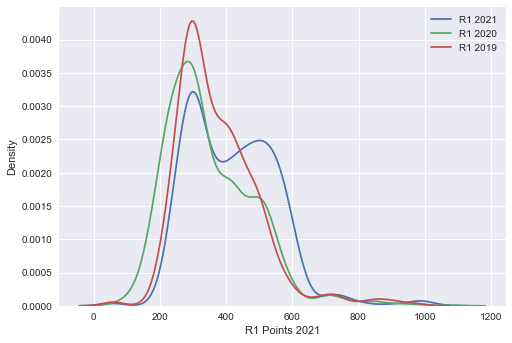

In [88]:
# Plot univariate or bivariate distributions using seaborn kernel density estimation [11]
# Change style to seaborn
plt.style.use('seaborn')
sns.kdeplot(allcourses['R1 Points 2021'], label='R1 2021')
sns.kdeplot(allcourses['R1 Points 2020'], label='R1 2020')
sns.kdeplot(allcourses['R1 Points 2019'], label='R1 2019')
plt.legend()
plt.show()

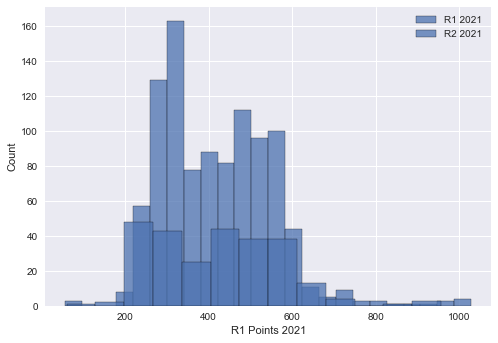

In [89]:
sns.histplot(allcourses['R1 Points 2021'], label='R1 2021')
sns.histplot(allcourses['R2 Points 2021'], label='R2 2021')
plt.legend()
plt.show()

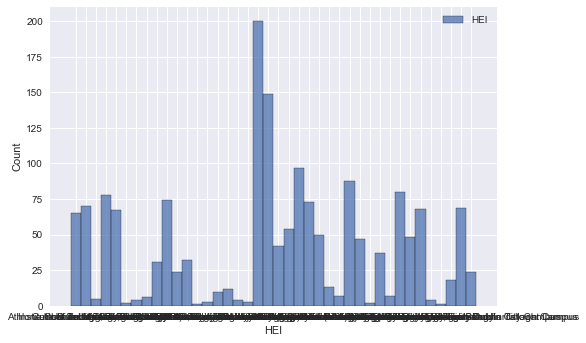

In [90]:
sns.histplot(allcourses['HEI'], label='HEI')
plt.legend()
plt.show()

## Conclusion / Next-steps
I will conclude by stating that I have realised that in order to carry out more meaningful analysis, I will need to also bring the college/institution names. As it stands, my dataframe is too large to produce graphs showing the individual course point movements (given there are 1651 courses in total). If I were to bring in the college names I  could show overall trends between the colleges. Should I be in a position to provide a further commit following tonight's deadline, I will strive to carry out this next step. 

***

## References
1. https://www.w3schools.com/python/python_regex.asp
2. https://www.w3schools.com/python/module_requests.asp
3. https://www.w3schools.com/python/python_datetime.asp
4. https://www.w3schools.com/python/pandas/pandas_intro.asp
5. https://www.geeksforgeeks.org/python-urllib-module/
6. http://www.cao.ie/index.php?page=points&p=2021
7 https://www.cao.ie/index.php?page=points&p=2020
8. https://www.geeksforgeeks.org/pandas-remove-special-characters-from-column-names/
9. https://www.cao.ie/index.php?page=points&p=2019
10. https://stackoverflow.com/questions/42135409/removing-a-character-from-entire-data-frame
10. https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
11. https://seaborn.pydata.org/generated/seaborn.kdeplot.html
